In [335]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [336]:
testperson = 18

In [337]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Muhammad_18.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.274782,1,1,-82.336243,22.537245,594.241760,-17.682873,19.378963,599.594971,0.700267,...,3.447952,3.360840,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive
1,0.285770,1,1,-82.330215,22.535000,594.319397,-17.661978,19.363342,599.695190,0.700227,...,3.451462,3.361023,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive
2,0.297759,1,1,-82.311333,22.532728,594.424866,-17.629908,19.340801,599.806946,0.700147,...,3.447449,3.368820,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive
3,0.307769,1,1,-82.273369,22.524414,594.634521,-17.579041,19.302549,599.973206,0.699987,...,3.453156,3.370056,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive
4,0.319732,1,1,-82.251137,22.522373,594.718933,-17.531052,19.285027,600.079590,0.699906,...,3.459061,3.372528,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive
5,0.330720,1,1,-82.218948,22.529003,594.832214,-17.476641,19.270308,600.198608,0.699791,...,3.457306,3.378143,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive
6,0.340708,1,1,-82.152634,22.553825,594.954163,-17.410690,19.270237,600.289429,0.699591,...,3.462631,3.386032,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive
7,0.352697,1,1,-82.126801,22.571470,595.035156,-17.362839,19.273441,600.390381,0.699501,...,3.457123,3.391174,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive
8,0.363854,1,1,-82.092186,22.583397,595.150818,-17.306553,19.272877,600.512817,0.699380,...,3.466507,3.387604,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive
9,0.374782,1,1,-82.019875,22.598984,595.375488,-17.221201,19.271921,600.684509,0.699132,...,3.467178,3.388123,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive


In [338]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(113040, 39)

In [339]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P07_text.txt', 'AI_HC_P07_MCQ.txt', 'AI_HC_P07_FIBQ.txt',
       'OR_HC_P07_text.txt', 'OR_HC_P07_MCQ.txt', 'OR_HC_P07_FIBQ.txt',
       'AI_SK_P07_text.txt', 'AI_SK_P07_MCQ.txt', 'AI_SK_P07_FIBQ.txt',
       'OR_SK_P07_text.txt', 'OR_SK_P07_MCQ.txt', 'OR_SK_P07_FIBQ.txt',
       'AI_KB_P07_text.txt', 'AI_KB_P07_MCQ.txt', 'AI_KB_P07_FIBQ.txt',
       'OR_KB_P07_text.txt', 'OR_KB_P07_MCQ.txt', 'OR_KB_P07_FIBQ.txt'],
      dtype=object)

In [340]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-130.766815,28.060682,415.157959,-68.497116,23.097237,429.774200,0.951367,...,3.136246,3.149017,True,OR_SK_P07_text.txt,7.0,20.0,Arial,SK,False,Immersive
1,0.009974,1,1,-130.766815,28.060682,415.157959,-68.497116,23.097237,429.774200,0.951367,...,3.136246,3.149017,True,OR_SK_P07_text.txt,7.0,20.0,Arial,SK,False,Immersive
2,0.022912,1,1,-130.765259,28.084604,415.152527,-68.497116,23.097237,429.774200,0.951366,...,3.184555,3.149017,True,OR_SK_P07_text.txt,7.0,20.0,Arial,SK,False,Immersive
3,0.333260,1,1,-129.035416,27.970791,413.807770,-66.688156,22.538006,428.352814,0.946857,...,3.144180,3.121185,True,OR_SK_P07_text.txt,7.0,20.0,Arial,SK,False,Immersive
4,0.343071,1,1,-129.035416,27.970791,413.807770,-66.688156,22.538006,428.352814,0.946857,...,3.144180,3.121185,True,OR_SK_P07_text.txt,7.0,20.0,Arial,SK,False,Immersive


In [341]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1029.446945,957.647858,443.435841,375.716586
1,0.009974,1029.446945,957.647858,443.435841,375.716586
2,0.022912,1029.446945,963.404465,443.435841,404.266319
3,0.333260,1098.732224,1043.053818,445.717692,428.438129
4,0.343071,1098.732224,1043.053818,445.717692,428.438129
...,...,...,...,...,...
7607,129.124014,959.553909,886.456375,671.061230,656.263676
7608,129.135012,955.999298,887.712860,676.809182,657.145758
7609,129.146955,953.801651,888.172607,678.811827,660.756655
7610,129.157288,946.272049,889.530716,678.292680,657.349477


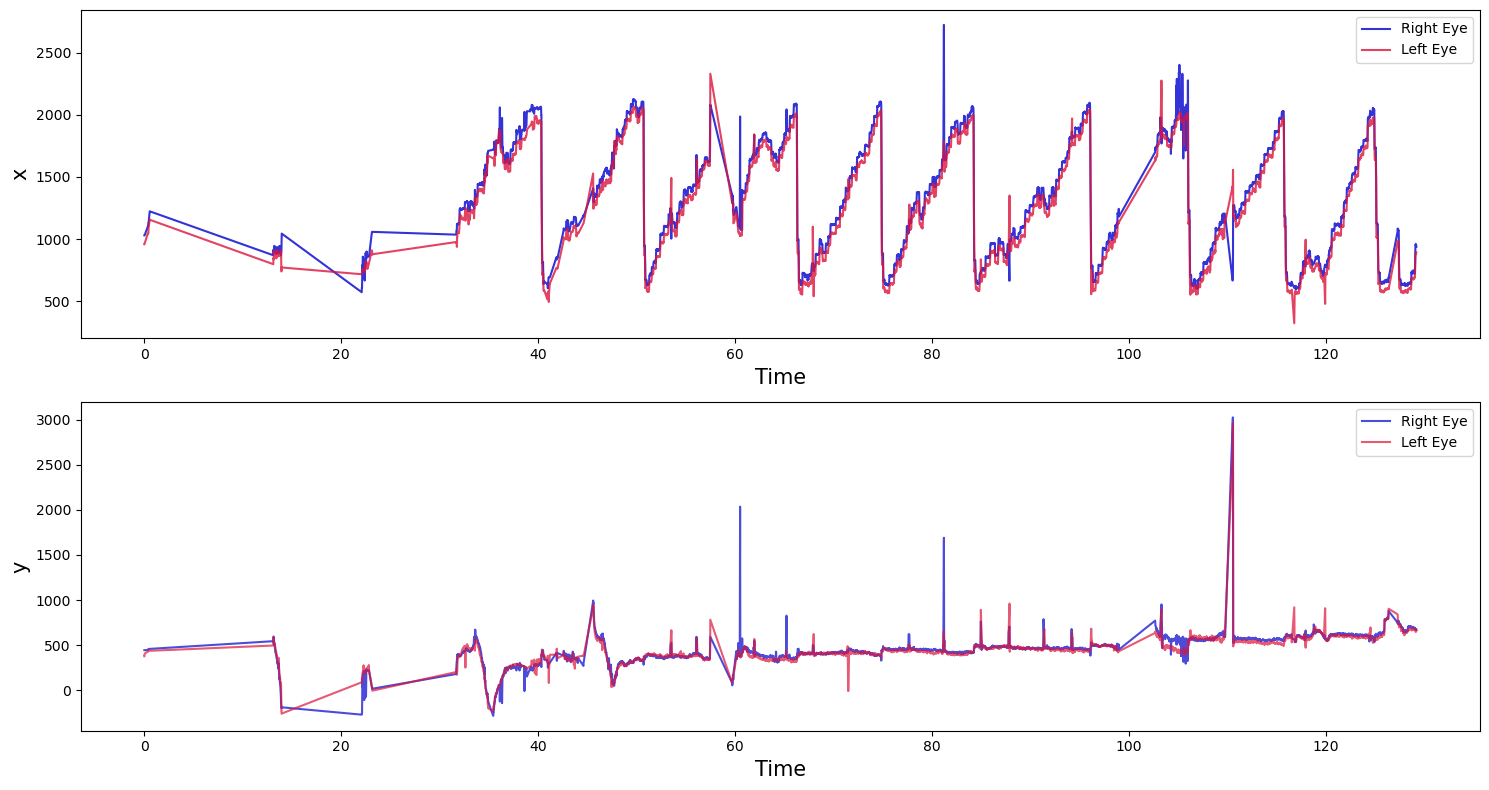

In [342]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [343]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [344]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [345]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR ]

In [346]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1051.348877,976.307144,916.232300,928.397684
1,0.010001,1093.720398,1022.537155,922.859201,923.494434
2,0.019979,1093.720398,1022.537155,922.859201,923.494434
3,0.032945,1197.709503,1125.553665,930.639925,916.896715
4,0.043886,1309.960632,1221.723099,909.603081,910.940323
...,...,...,...,...,...
374,4.216925,1155.323944,1085.357513,870.933008,861.895552
375,4.229963,1148.820648,1069.309616,856.509933,850.163441
376,4.240135,1083.675156,988.933945,751.412058,780.583420
377,4.250107,1083.675156,988.933945,751.412058,780.583420


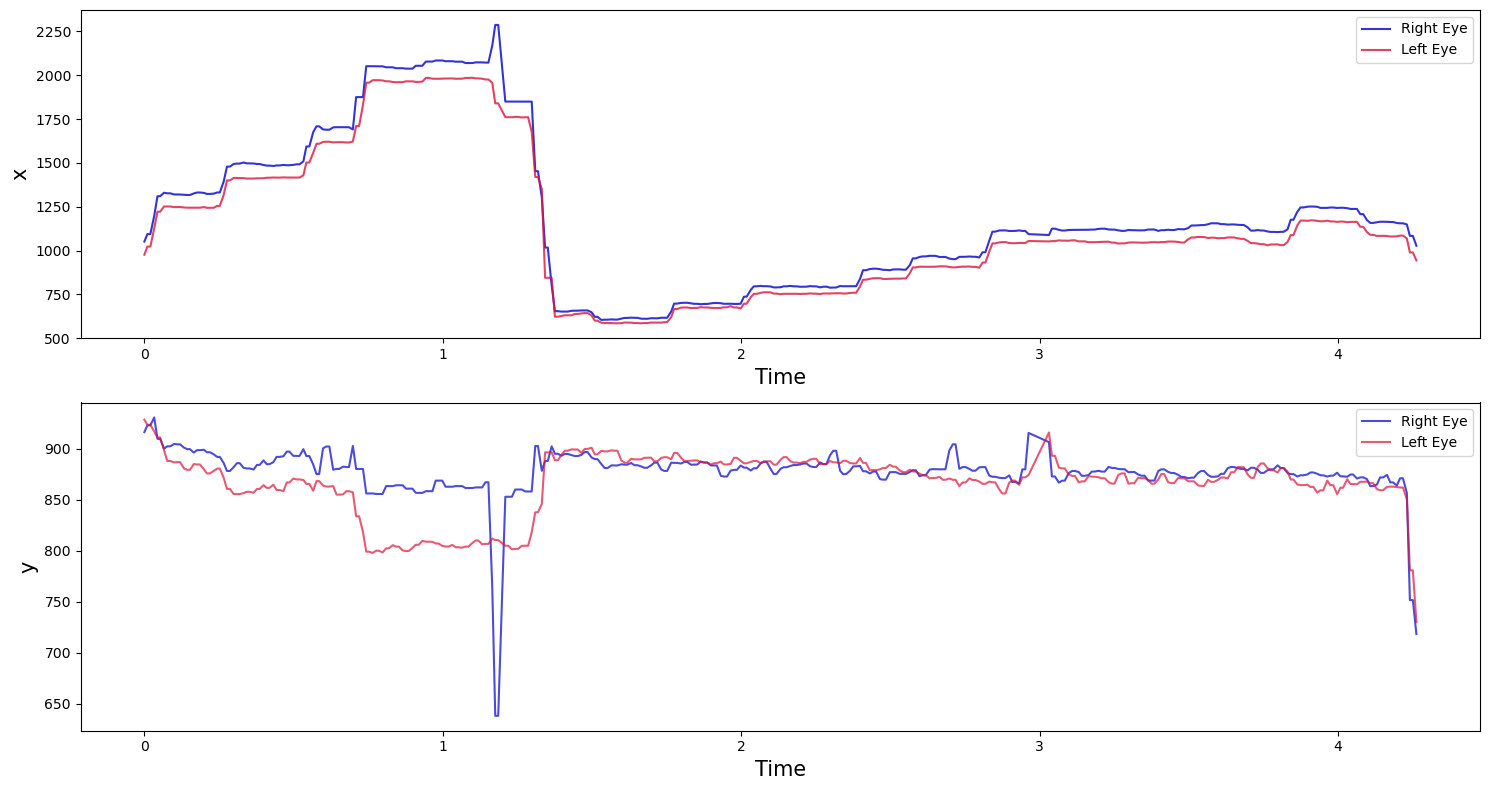

In [347]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


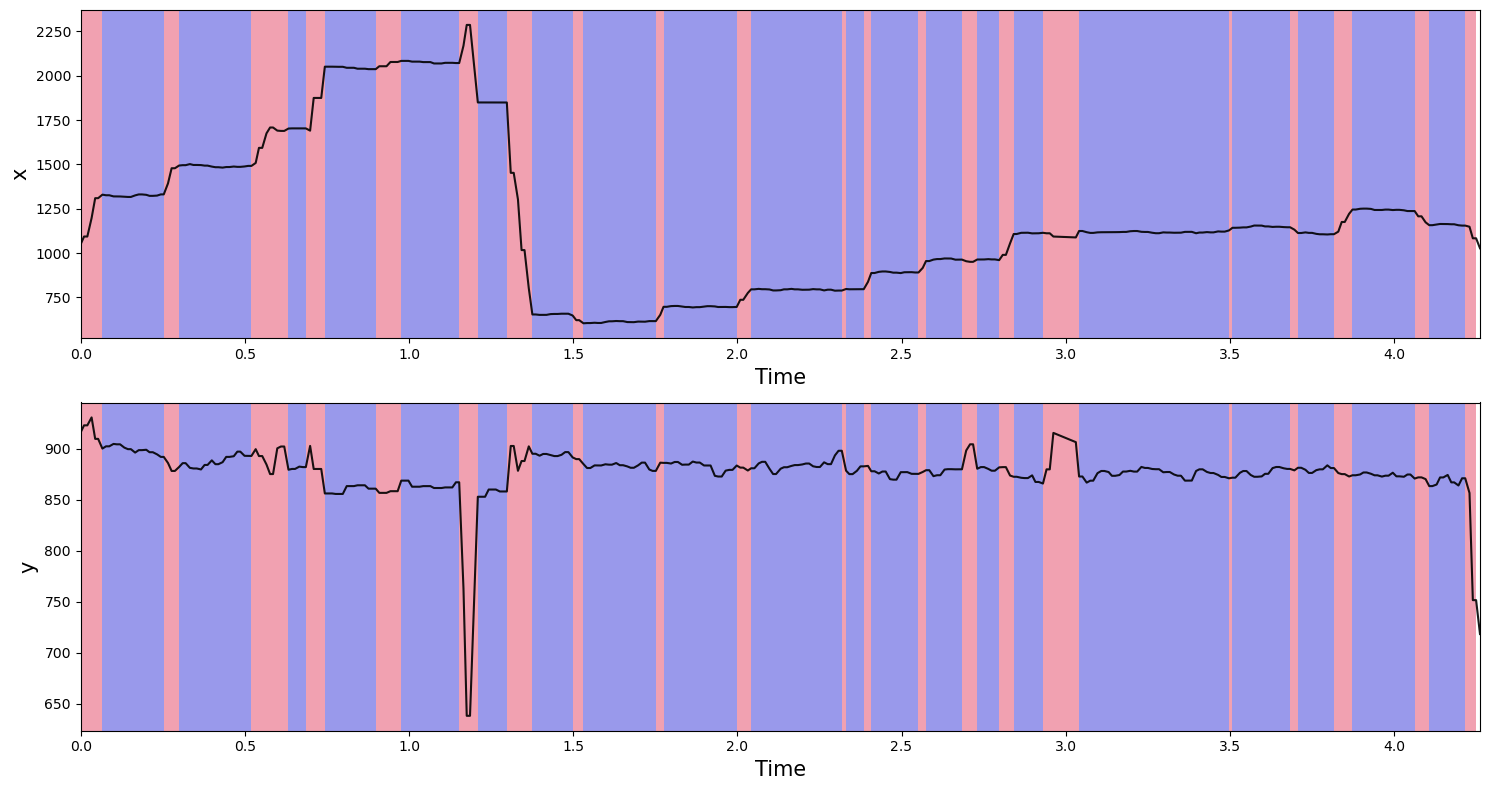

In [348]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [349]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [350]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-100.133507,11.096858,563.853088,-36.347618,14.163261,571.770142,0.756387,...,3.765671,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Skimming,1
1,0.010621,1,1,-100.178032,11.490898,564.202209,-36.425446,14.436996,572.021790,0.756326,...,3.754684,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Skimming,1
2,0.022606,1,1,-100.188080,11.610761,564.312073,-36.477268,14.650190,572.228394,0.756297,...,3.747421,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Skimming,1
3,0.033594,1,1,-100.200142,11.844399,564.464172,-36.522369,14.859651,572.379700,0.756250,...,3.751556,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Skimming,1
4,0.044586,1,1,-100.260422,12.263407,565.055725,-36.592014,15.147627,572.810730,0.756119,...,3.747681,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Skimming,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,3.213655,1,1,-91.508415,21.911299,579.612732,-26.894567,21.277109,586.237122,0.727829,...,3.614258,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Skimming,1
290,3.225606,1,1,-91.479073,21.887096,579.591064,-26.845665,21.256281,586.199585,0.727766,...,3.622849,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Skimming,0
291,3.236624,1,1,-91.343208,21.848825,579.365112,-26.731924,21.215277,585.945374,0.727521,...,3.619446,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Skimming,0
292,3.246615,1,1,-91.156616,21.823027,579.487793,-26.587946,21.190607,586.024963,0.727015,...,3.620636,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Skimming,0


In [351]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [352]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-82.336243,22.537245,594.241760,-17.682873,19.378963,599.594971,0.700267,...,3.360840,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive,1
1,0.010988,1,1,-82.330215,22.535000,594.319397,-17.661978,19.363342,599.695190,0.700227,...,3.361023,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive,1
2,0.022976,1,1,-82.311333,22.532728,594.424866,-17.629908,19.340801,599.806946,0.700147,...,3.368820,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive,1
3,0.032986,1,1,-82.273369,22.524414,594.634521,-17.579041,19.302549,599.973206,0.699987,...,3.370056,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive,1
4,0.044950,1,1,-82.251137,22.522373,594.718933,-17.531052,19.285027,600.079590,0.699906,...,3.372528,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7881,93.299970,1,1,-58.506977,24.540194,600.691772,6.642578,15.293362,603.229309,0.641518,...,3.072296,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive,1
7882,93.310789,1,1,-58.540333,24.546038,600.747559,6.628319,15.303235,603.285706,0.641584,...,3.075531,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive,1
7883,93.322777,1,1,-58.560024,24.551218,600.761902,6.622809,15.307193,603.298645,0.641627,...,3.076752,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive,1
7884,93.333763,1,1,-58.578384,24.550823,600.778748,6.602742,15.314989,603.322571,0.641667,...,3.077286,True,AI_HC_P07_text.txt,7.0,20.0,Arial,HC,False,Immersive,1


In [353]:
colunms_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [354]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [355]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")